# Imports

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# open file

In [74]:
data = pd.read_csv("April 2021.csv")
print(data)

     Rank         Channel  Avg. Viewers  Time Streamed  All-Time Peak Viewers  \
0      #1           xQcOW         89542          333.7                 222720   
1      #2      tommyinnit        258561           10.9                 650237   
2      #3       auronplay        115660           87.0                 313347   
3      #4      RanbooLive         85632          145.9                 346132   
4      #5  GeorgeNotFound        168391            9.6                 307439   
..    ...             ...           ...            ...                    ...   
495  #496        singsing          4054          190.4                  24068   
496  #497          uhSnow          4790          135.5                  36954   
497  #498     los_jotinha          5280          117.8                  15225   
498  #499     momo_sports          6653           57.3                  21197   
499  #500          ScreaM          8992           11.1                  27007   

     Hours Watched  Followe

In [75]:
data = data.iloc[: , :-2]#drop last two cols of data
print(data)

     Rank         Channel  Avg. Viewers  Time Streamed  All-Time Peak Viewers  \
0      #1           xQcOW         89542          333.7                 222720   
1      #2      tommyinnit        258561           10.9                 650237   
2      #3       auronplay        115660           87.0                 313347   
3      #4      RanbooLive         85632          145.9                 346132   
4      #5  GeorgeNotFound        168391            9.6                 307439   
..    ...             ...           ...            ...                    ...   
495  #496        singsing          4054          190.4                  24068   
496  #497          uhSnow          4790          135.5                  36954   
497  #498     los_jotinha          5280          117.8                  15225   
498  #499     momo_sports          6653           57.3                  21197   
499  #500          ScreaM          8992           11.1                  27007   

     Hours Watched  Followe

# Making a function to find max of specfied collum

In [76]:
def findMax(col):
    #get most amout
    maxValue = data[col].max()
    #get name of the person who had that amopunt
    return(data.loc[data[col] == maxValue,["Channel"]])

# Q1.

In [77]:
#Most Time Streamed
print("A-","Time Streamed",findMax("Time Streamed"))
print()
#All-Time Peak Viewers
print("B-","All-Time Peak Viewers",findMax("All-Time Peak Viewers"))
print()
#Hours Watched
print("C-","Hours Watched",findMax("Hours Watched"))
print()
#Total Followers
print("D-","Total Followers",findMax("Total Followers"))
print()
#Total Views
print("E-","Total Views",findMax("Total Views"))
print()

A- Time Streamed     Channel
68  otplol_

B- All-Time Peak Viewers      Channel
24  TheGrefg

C- Hours Watched   Channel
0   xQcOW

D- Total Followers     Channel
134   Ninja

E- Total Views        Channel
26  Fextralife



# Q2. Most follower gain

In [78]:
#Followers Gained
print("Followers Gained",findMax("Followers Gained"))
print()

Followers Gained      Channel
13  AdinRoss



# Most follower loss

In [79]:
#get most amout of followers lossed
topFollowerLoss = data["Followers Gained"].min()
#get name of the person who had that amopunt lossed
print("Followers Lost",data.loc[data["Followers Gained"] == topFollowerLoss,["Channel"]])

Followers Lost        Channel
58  sodapoppin


# Corrilation between time streamed and followers gained?

Text(0.5, 1.0, 'Followers gined compaired to hours streamed')

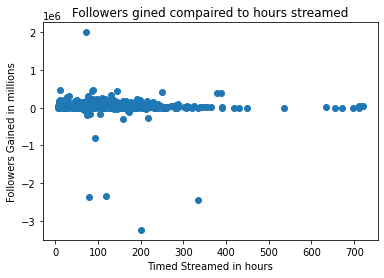

In [80]:
followers = data["Followers Gained"].tolist()
streamTimes = data["Time Streamed"].tolist()
plt.scatter(streamTimes,followers)
plt.xlabel("Timed Streamed in hours")
plt.ylabel("Followers Gained in millions")
plt.title("Followers gined compaired to hours streamed")

There seems to be no correlation

# Question 4

average viewers multiplied by time streamed equate (roughly) to hours watched?

In [81]:
advViewer = data["Avg. Viewers"].tolist()
streamTimes = data["Time Streamed"].tolist()
estHoursWatched = [round(advViewer[i]*streamTimes[i],1) for i in range(len(advViewer))]
print(estHoursWatched)

[29880165.4, 2818314.9, 10062420.0, 12493708.8, 1616553.6, 16951678.8, 12003609.6, 14100542.4, 16313166.0, 1939905.5, 8320579.2, 9119142.8, 9174465.0, 5887453.2, 3053972.3, 906313.2, 3977623.8, 6170649.0, 8771094.6, 7455894.2, 8150508.0, 8411138.4, 7253516.7, 7927416.3, 5193976.0, 3998158.9, 4251142.5, 4962018.0, 3671064.0, 2969435.7, 5940815.3, 570166.7, 2786895.0, 1152110.7, 7564545.6, 4677955.8, 3911302.6, 1772700.0, 3696838.0, 6423532.2, 679384.8, 4629900.9, 4248895.2, 3888940.0, 5931520.0, 4472025.1, 5143763.1, 2067795.0, 1218051.0, 2619274.1, 4030874.7, 386614.8, 1008450.0, 2690469.6, 3703470.3, 2040673.3, 4744324.2, 3482913.0, 3905094.2, 1057264.0, 4335969.6, 3605465.6, 3237871.0, 3775200.0, 3044037.2, 3079296.0, 1482643.2, 4081986.5, 4825686.5, 3534302.4, 3658046.0, 3784034.8, 1566229.5, 3114386.2, 2786407.0, 1955255.3, 758551.5, 3053042.4, 2639104.0, 1552747.2, 2132904.0, 2566860.0, 2770177.2, 2284686.6, 2617162.2, 3272712.8, 3185244.0, 974213.5, 1892923.2, 3079403.8, 1244821.

finding diffrence between our est and the actual values

In [82]:
hoursWatched = data["Hours Watched"].tolist()
difHoursWatched = []
for i in range(len(estHoursWatched)):
    difHoursWatched.append(round(abs(estHoursWatched[i]-hoursWatched[i]),1))
print(difHoursWatched)
print("Max diffrence",max(difHoursWatched))
print("Min diffrence",min(difHoursWatched))

[141.4, 4309.1, 3822.0, 2886.2, 5609.6, 1324.8, 24.6, 1591.6, 1443.0, 5.5, 55.8, 3315.8, 2098.0, 1398.2, 1637.7, 3072.2, 1372.8, 1912.0, 1722.6, 1426.2, 732.0, 541.6, 2021.7, 152.7, 34.0, 40.1, 44.5, 696.0, 1621.0, 5.3, 459.7, 1782.7, 23.0, 2170.7, 649.6, 619.2, 1326.4, 5.0, 705.0, 590.8, 1836.8, 98.9, 542.8, 56.0, 340.0, 359.1, 326.9, 1969.0, 2262.0, 1007.1, 1050.7, 2450.8, 11.0, 1044.6, 1130.3, 554.7, 451.2, 1142.0, 937.2, 1181.0, 751.6, 305.4, 346.0, 609.0, 0.8, 335.0, 575.8, 482.5, 136.5, 518.4, 233.0, 517.2, 513.5, 718.2, 24.0, 1290.3, 2062.5, 191.6, 860.0, 17.8, 11.0, 333.0, 946.2, 386.6, 49.2, 161.2, 201.0, 9.5, 1142.2, 66.2, 1348.8, 457.5, 337.7, 744.0, 21.7, 2.0, 462.6, 358.2, 746.0, 721.8, 256.2, 620.8, 286.0, 705.4, 723.0, 178.9, 3.0, 334.4, 40.0, 828.7, 649.8, 45.6, 193.0, 564.5, 735.8, 415.0, 295.0, 258.5, 512.6, 627.2, 597.9, 112.2, 360.8, 208.5, 707.8, 321.4, 808.5, 34.0, 245.0, 27.2, 44.0, 966.4, 644.2, 101.8, 61.8, 43.9, 112.4, 184.8, 825.6, 149.0, 483.4, 618.1, 189.6,

This method seems very hit or miss, being anywhere from .2hours off all the way to 5609.6 hours off

# Question 5

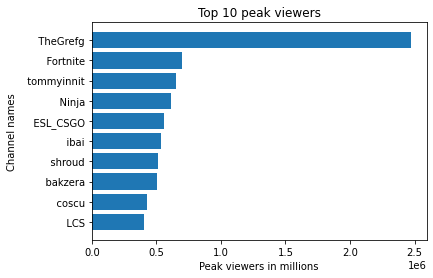

In [83]:
allTimePeaks = data["All-Time Peak Viewers"].sort_values()[-10:].tolist()
peakChannels = [data[data["All-Time Peak Viewers"] == i]["Channel"].to_string()[3:] for i in allTimePeaks]
plt.barh(peakChannels,allTimePeaks)
plt.xlabel("Peak viewers in millions")
plt.ylabel("Channel names")
plt.title("Top 10 peak viewers")
plt.show()

# Question 6

In [84]:
hoursStreamed = data["Time Streamed"].tolist()
print("Total hours watched:",round(sum(hoursStreamed),2))

Total hours watched: 72026.8


# Question 7

In [85]:
hoursWatched = data["Hours Watched"].tolist()
print("Total hours watched:",sum(hoursWatched))

Total hours watched: 829974419


# Question 8

In [86]:
totalFollowers = data["Total Followers"].tolist()
followersGained = data["Followers Gained"].tolist()
followersInMarch = [totalFollowers[i]-followersGained[i] for i in range(len(totalFollowers))]
mostFollowersInMarch = 0
for f in followersInMarch:
    if f > mostFollowersInMarch:
        mostFollowersInMarch = f
channelWithMostFollowersMarch = data[data["Total Followers"]-data["Followers Gained"] == mostFollowersInMarch]["Channel"].to_string()[7:]
print("Most Followers in March:",channelWithMostFollowersMarch,mostFollowersInMarch)
                                     

Most Followers in March: Ninja 16907292
